<h2>Import Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

<h2>Import Data</h2>

In [2]:
df = pd.read_parquet('data/cleaned_data.parquet')
df.head()

,DATE,TMP,WND_DIR,WND_SPEED,RH,COMED_MW,YEAR,GDP,POPULATION,DATE_CENTRAL,...,WINTER,epoch,IS_HOLIDAY,NEAR_HOLIDAY,HOLIDAY_WEEKEND,IS_DAYTIME,DAWN,DUSK,MIN_TEMP,MAX_TEMP
0,2017-01-01 01:00:00+00:00,28.04,260,6.93439,71.273049,11587.0,2017,8833000,24536000,2016-12-31 19:00:00-06:00,...,True,1.483232e+09,False,False,True,False,False,False,24.98,39.92
1,2017-01-01 02:00:00+00:00,26.96,260,4.69749,71.701603,11549.0,2017,8833000,24536000,2016-12-31 20:00:00-06:00,...,True,1.483236e+09,False,False,True,False,False,False,24.98,39.92
2,2017-01-01 03:00:00+00:00,26.06,250,5.81594,74.418167,11273.0,2017,8833000,24536000,2016-12-31 21:00:00-06:00,...,True,1.483240e+09,False,False,True,False,False,False,24.98,39.92
3,2017-01-01 04:00:00+00:00,26.06,240,6.93439,77.333391,11085.0,2017,8833000,24536000,2016-12-31 22:00:00-06:00,...,True,1.483243e+09,False,False,True,False,False,False,24.98,39.92
4,2017-01-01 05:00:00+00:00,24.98,250,6.93439,80.879103,10801.0,2017,8833000,24536000,2016-12-31 23:00:00-06:00,...,True,1.483247e+09,False,False,True,False,False,False,24.98,39.92


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56746 entries, 0 to 56745
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype                          
---  ------              --------------  -----                          
 0   DATE                56746 non-null  datetime64[ns, UTC]            
 1   TMP                 56746 non-null  float64                        
 2   WND_DIR             56746 non-null  int32                          
 3   WND_SPEED           56746 non-null  float64                        
 4   RH                  56746 non-null  float64                        
 5   COMED_MW            56746 non-null  float64                        
 6   YEAR                56746 non-null  int32                          
 7   GDP                 56746 non-null  int64                          
 8   POPULATION          56746 non-null  int32                          
 9   DATE_CENTRAL        56746 non-null  datetime64[ns, America/Chicago]
 10  WEEKDAY_Fr

In [4]:
# create scaled version
X = df.drop(columns=['DATE', 'DATE_CENTRAL', 'SEASON', 'COMED_MW'])
y = df['COMED_MW']

sc = preprocessing.StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc = pd.DataFrame(X_sc, columns=X.columns)

df_sc = pd.concat([X_sc, y], axis=1)
df_sc.head()

,TMP,WND_DIR,WND_SPEED,RH,YEAR,GDP,POPULATION,WEEKDAY_Friday,WEEKDAY_Monday,WEEKDAY_Saturday,...,epoch,IS_HOLIDAY,NEAR_HOLIDAY,HOLIDAY_WEEKEND,IS_DAYTIME,DAWN,DUSK,MIN_TEMP,MAX_TEMP,COMED_MW
0,-1.102052,0.636051,-0.721363,0.251370,1.494847,1.503416,-0.096457,-0.407761,-0.406556,2.451531,...,1.232865,-0.168131,-0.240879,4.547923,-0.320066,-0.29341,-0.252655,-0.935206,-0.879446,11587.0
1,-1.153843,0.636051,-1.176192,0.276455,1.494847,1.503416,-0.096457,-0.407761,-0.406556,2.451531,...,1.232922,-0.168131,-0.240879,4.547923,-0.320066,-0.29341,-0.252655,-0.935206,-0.879446,11549.0
2,-1.197002,0.536231,-0.948778,0.435467,1.494847,1.503416,-0.096457,-0.407761,-0.406556,2.451531,...,1.232978,-0.168131,-0.240879,4.547923,-0.320066,-0.29341,-0.252655,-0.935206,-0.879446,11273.0
3,-1.197002,0.436412,-0.721363,0.606108,1.494847,1.503416,-0.096457,-0.407761,-0.406556,2.451531,...,1.233035,-0.168131,-0.240879,4.547923,-0.320066,-0.29341,-0.252655,-0.935206,-0.879446,11085.0
4,-1.248793,0.536231,-0.721363,0.813654,1.494847,1.503416,-0.096457,-0.407761,-0.406556,2.451531,...,1.233091,-0.168131,-0.240879,4.547923,-0.320066,-0.29341,-0.252655,-0.935206,-0.879446,10801.0


<h2>Visualization 1: Correlation Matrix</h2>

<Axes: >

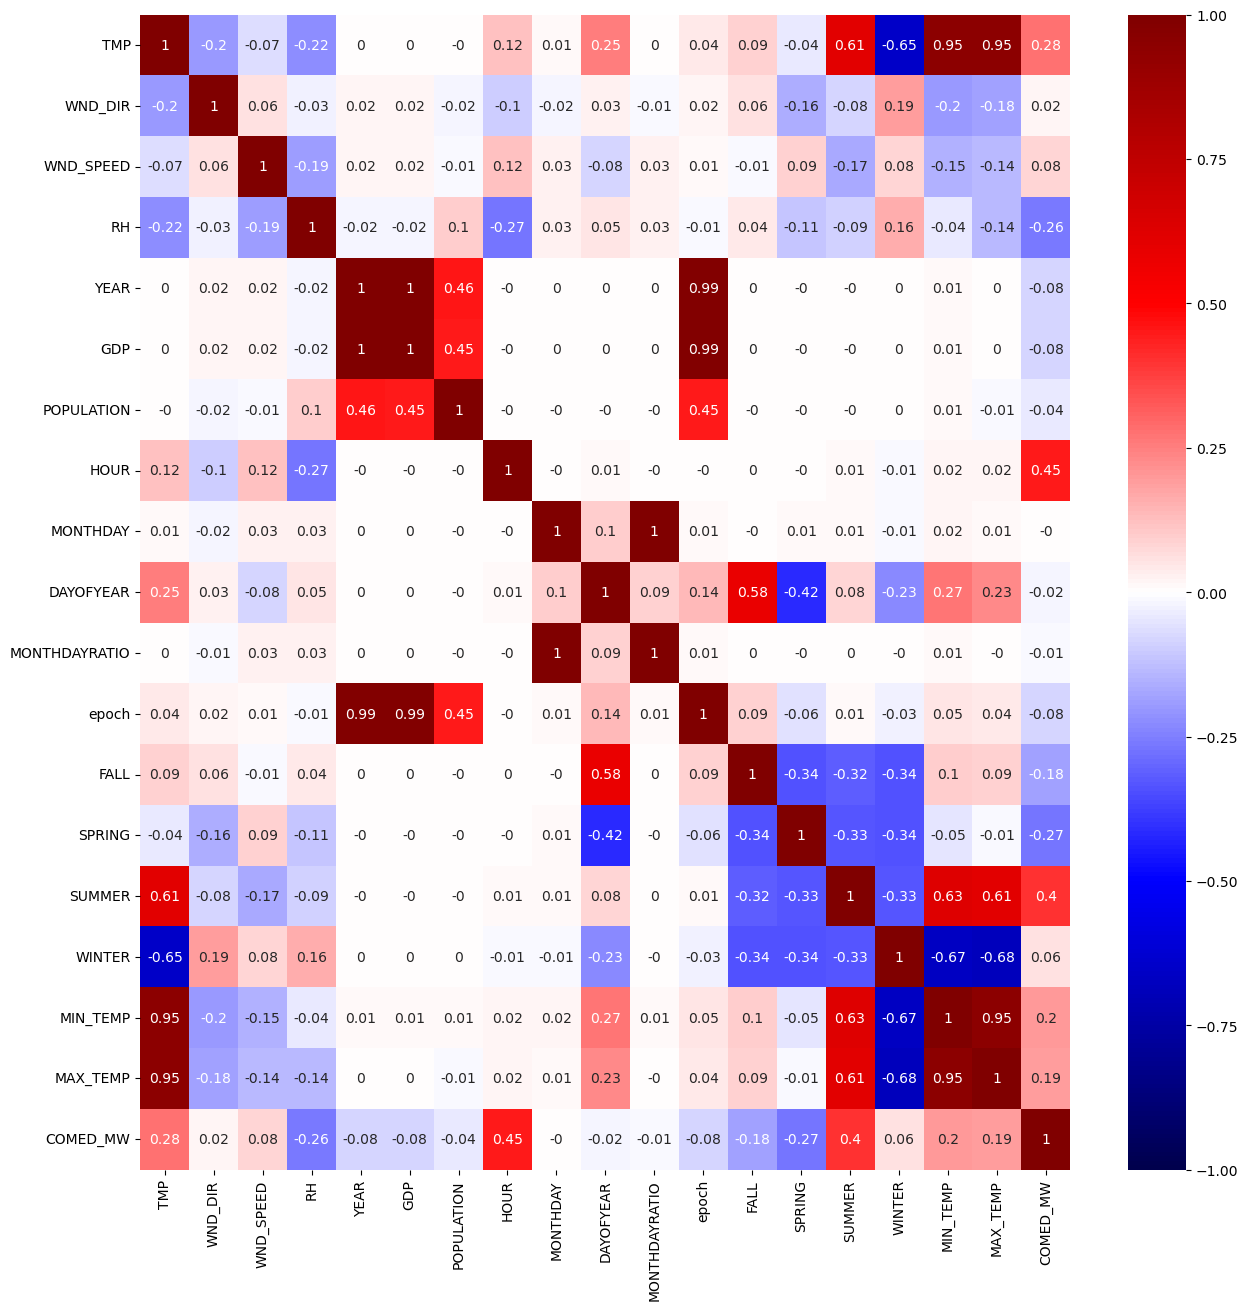

In [5]:
df_sc_corr = df_sc[['TMP', 'WND_DIR', 'WND_SPEED', 'RH', 'YEAR', 'GDP', 'POPULATION', 
                    'HOUR', 'MONTHDAY', 'DAYOFYEAR', 'MONTHDAYRATIO', 'epoch',
                    'FALL', 'SPRING', 'SUMMER', 'WINTER',
                    'MIN_TEMP', 'MAX_TEMP', 'COMED_MW']].corr()
col_names = list(df_sc_corr.columns)
df_sc_corr = df_sc_corr.round(2)

fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot()

# test = ax.imshow(df_sc_corr, interpolation='nearest', vmin=-1, vmax=1, cmap='seismic')
# ax.set_title('Scaled Correlation Map')
# ax.set_xticks(range(0,19))
# ax.set_yticks(range(0,19))
# ax.tick_params(axis='x', labelrotation=90)
# ax.set_xticklabels(col_names)
# ax.set_yticklabels(col_names)
# plt.colorbar(test, fraction=0.046, pad=0.04)

sns.heatmap(df_sc_corr, vmin=-1, vmax=1, cmap='seismic', annot=True)

<h2>Visualization 2: COMED_MW Histograms</h2>

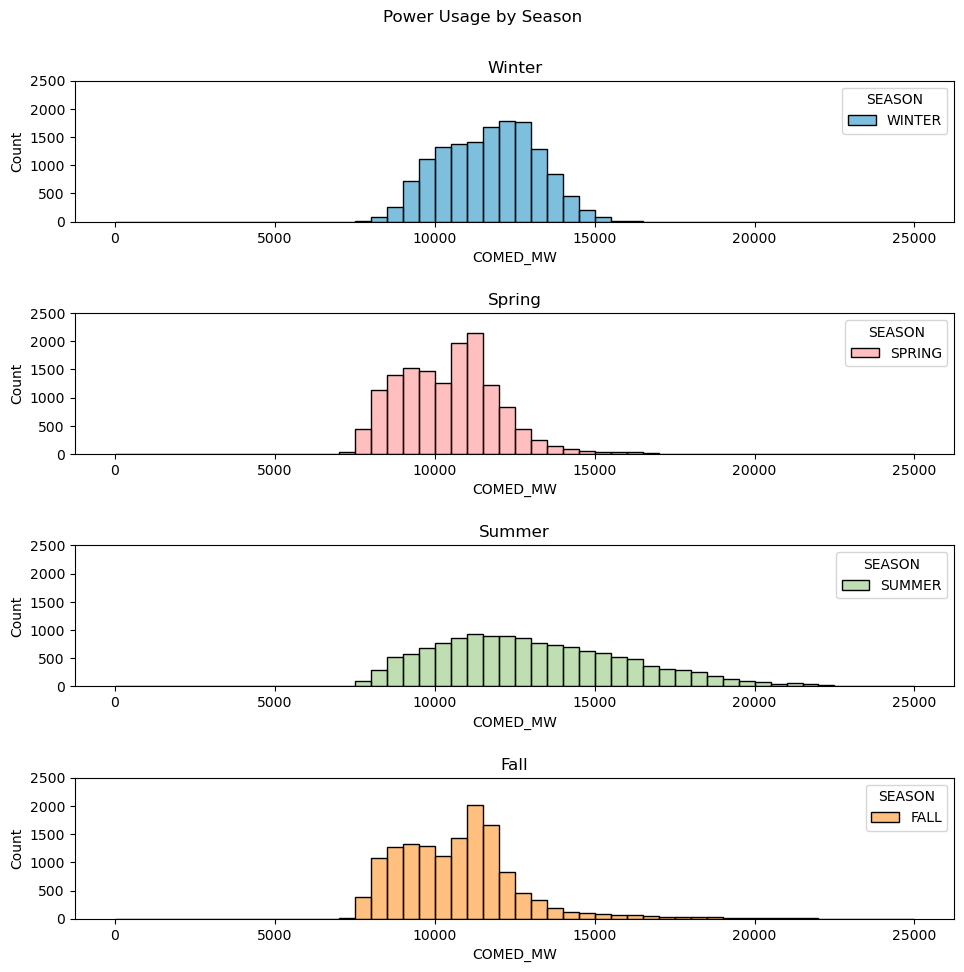

In [6]:
df_winter = df[df['WINTER']==1]
df_spring = df[df['SPRING']==1]
df_summer = df[df['SUMMER']==1]
df_fall = df[df['FALL']==1]

fig, axs = plt.subplots(4, 1, figsize=(10,10))
sns.histplot(df_winter, x='COMED_MW', binrange=(0, 25000), binwidth=500, hue='SEASON', ax=axs[0], palette='winter')
sns.histplot(df_spring, x='COMED_MW', binrange=(0, 25000), binwidth=500, hue='SEASON', ax=axs[1], palette='spring')
sns.histplot(df_summer, x='COMED_MW', binrange=(0, 25000), binwidth=500, hue='SEASON', ax=axs[2], palette='summer')
sns.histplot(df_fall, x='COMED_MW', binrange=(0, 25000), binwidth=500, hue='SEASON', ax=axs[3], palette='autumn')

axs[0].set_ylim([0, 2500])
axs[1].set_ylim([0, 2500])
axs[2].set_ylim([0, 2500])
axs[3].set_ylim([0, 2500])

axs[0].set_title('Winter')
axs[1].set_title('Spring')
axs[2].set_title('Summer')
axs[3].set_title('Fall')

plt.suptitle('Power Usage by Season')

plt.tight_layout(pad=2)

<h2>Visualization 3: Power Over Time</h2>

Text(0, 0.5, 'Power (MWH)')

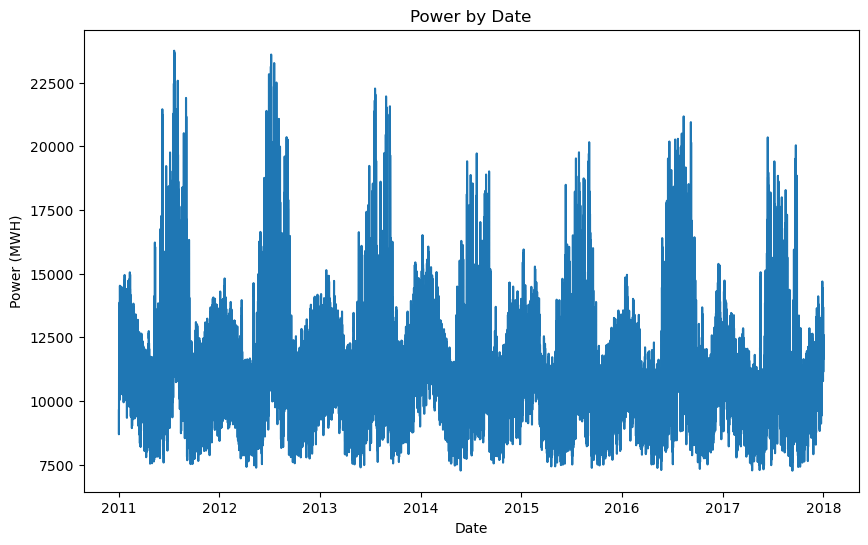

In [7]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(df, x='DATE', y='COMED_MW')
plt.title('Power by Date')
plt.xlabel('Date')
plt.ylabel('Power (MWH)')

Text(0, 0.5, 'Power (MWH)')

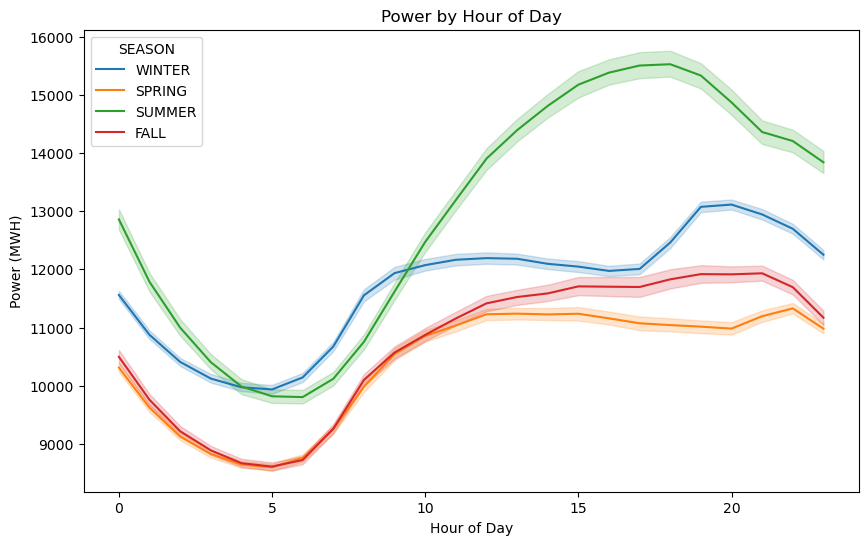

In [8]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(df, x='HOUR', y='COMED_MW', hue='SEASON')
plt.title('Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Power (MWH)')

Text(0, 0.5, 'Power (MWH)')

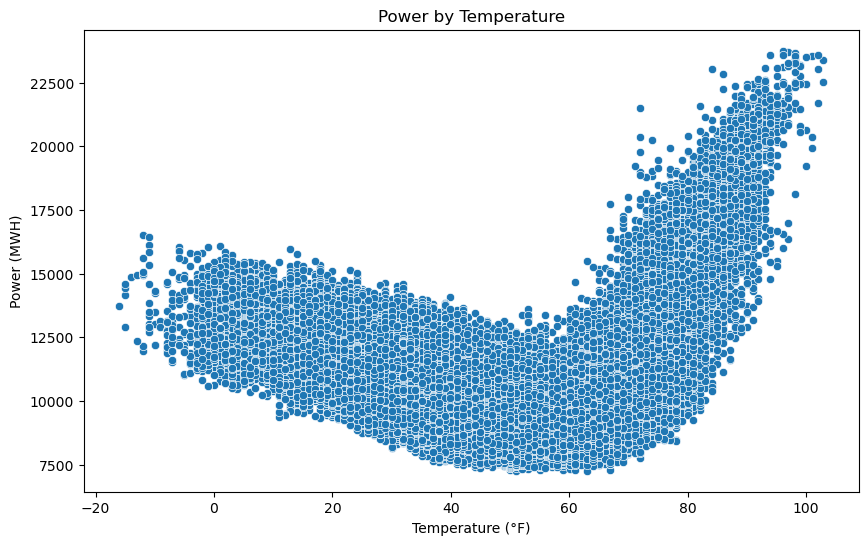

In [9]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(df, x='TMP', y='COMED_MW')
plt.title('Power by Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Power (MWH)')

<h2>Visualization 4: Power by Census</h2>

<Axes: xlabel='COMED_MW', ylabel='Count'>

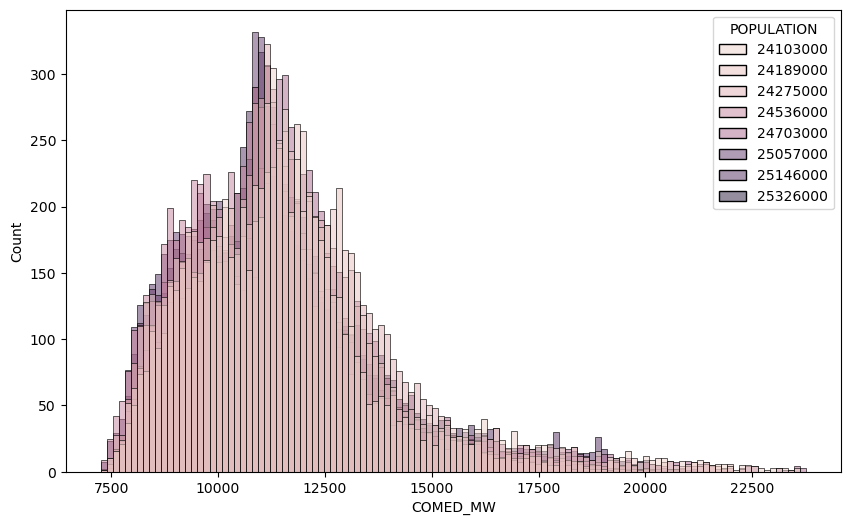

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df, x='COMED_MW', hue='POPULATION')